# MNIST Digit Recognition ANN

This notebook is a tutorial on how to train and test a neural network to identify hand written digits of the MNIST dataset.

In [33]:
# Import libraries
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

A `torch.device` is an object representing the device on which a `torch.Tensor` is or will be allocated.

The `torch.device` contains a device type ('cpu', 'cuda' or 'mps') and optional device ordinal for the device type. If the device ordinal is not present, this object will always represent the current device for the device type, even after `torch.cuda.set_device()` is called; e.g., a `torch.Tensor` constructed with device 'cuda' is equivalent to 'cuda:X' where X is the result of `torch.cuda.current_device()`.

A `torch.Tensor`’s device can be accessed via the `Tensor.device` property.

In [9]:
# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Data normalisation important as it standardises the range of input features. This is done to ensure that no particular feature dominates the learning process simply because of its scale.

The MNIST dataset consists of grayscale images, and the pixel intensities are originally between 0 and 255. The `transforms.ToTensor()` transform scales these values to be between 0 and 1. The `transforms.Normalize((0.5,), (0.5,))` transform then shifts the pixel values to be between -1 and 1. When the data is centered around 0 (i.e., in the range -1 to 1), the gradients during backpropagation are less likely to vanish or explode, which can lead to more stable training. This is particularly important for deeper networks.

The two arguments to `transforms.Normalize` are the mean and standard deviation respectively. In this case, we assume the mean and standard deviation to be 0.5, which is a rough estimate for the MNIST dataset after scaling the pixel intensities to the range 0 to 1. This normalization helps the neural network learn more effectively.

`transforms.Compose()` is used to chain together multiple multiple image transformations into a single transform.

In [12]:
# Define a transform to normalize the data
transform = transforms.Compose(
    transforms=[transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

The `datasets.MNIST` class in PyTorch’s torchvision module is used to load the MNIST (Modified National Institute of Standards and Technology) dataset. The MNIST dataset is a large database of handwritten digits that is commonly used for training image processing systems.

- `root` is the path where the MNIST data is stored or downloaded to.
- `train` is a boolean flag that indicates whether to load the training set (60,000 images and labels) or the testing set (10,000 images and labels).
- `download` is a boolean flag that indicates whether to download the dataset from the internet ifv it not available at the `root` directory.
- `transform` is a transform that is applied.

In [13]:
# Download the training data
trainset = datasets.MNIST(
    root="~/.pytorch/MNIST_data/",
    download=True,
    train=True,
    transform=transform,
)
trainset

100%|██████████| 9912422/9912422 [00:00<00:00, 10527343.47it/s]


Extracting C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 3610601.90it/s]


Extracting C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 6851209.13it/s]


Extracting C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Brogan.McCawley/.pytorch/MNIST_data/MNIST\raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\Brogan.McCawley/.pytorch/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

The `DataLoader` helps to load and preprocess data conveniently. It automatically divides the data into batches of a specified size, which can then be processed independently. This is particularly useful when working with large datasets that won't fit entirely in memory. It also shuffles the data at each epoch, ensuring that the model gets different batches in each epoch.

In [17]:
# Load the dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
trainloader

In [51]:
# Explore the dataset
trainloader.dataset[0][0][0]

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

Plot MNIST images.

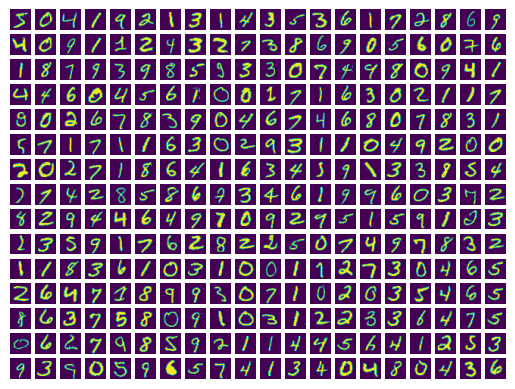

In [57]:
nrows = 15
ncols = 20
fig, axs = plt.subplots(nrows, ncols)
for i, ax in enumerate(axs.flat):
    ax.imshow(trainloader.dataset[i][0][0])
    ax.axis("off")

sdfsdf

In [ ]:
# Define a simple ANN with two hidden layers and one output layer
model = nn.Sequential(
    nn.Linear(784, 128),  # Input layer (784 inputs, 128 outputs)
    nn.ReLU(),  # Activation function (ReLU)
    nn.Linear(128, 64),  # Hidden layer (128 inputs, 64 outputs)
    nn.ReLU(),  # Activation function (ReLU)
    nn.Linear(64, 10),  # Output layer (64 inputs, 10 outputs)
    nn.LogSoftmax(dim=1),
)  # Activation function (LogSoftmax)